In [2]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, mutual_info_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS

import matplotlib.pyplot as plt

from keras.datasets import mnist

import sys
import os
sys.path.append(os.path.abspath('..'))
from utils.pcode import isProperSuperset, findDifferentElements, flatten, findLargestGaps, grouping, simpleGrouping, simpleGroupingVectors
from utils.load import inflectionpoint, gen_corr_matrix

In [3]:
color = ["red", "yellow", "green", "brown", "orange", "navy", "royalblue"]
color2_2 = [["red", "blue"], ["darkorange", "royalblue"]]
reds = ["red", "orangered", "darkorange", "crimson"]
blues = ["blue", "navy","royalblue",  "deepskyblue"]
line = ["-","--","-.", ":"]

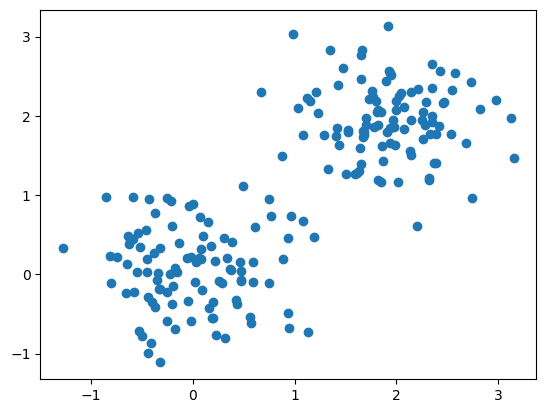

In [11]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate two sets of random points
cluster1 = np.random.normal(loc=[0, 0], scale=[0.5, 0.5], size=(100, 2))
cluster2 = np.random.normal(loc=[2, 2], scale=[0.5, 0.5], size=(100, 2))

# Combine the two sets of points into one point cloud
point_cloud = np.concatenate((cluster1, cluster2))

# Plot the point cloud
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])
plt.show()


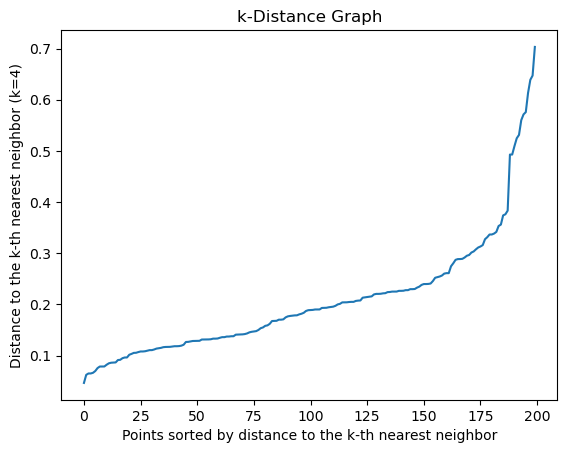

In [12]:
%matplotlib inline
sorted_distances = inflectionpoint(point_cloud)

plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the k-th nearest neighbor')
plt.ylabel(f'Distance to the k-th nearest neighbor (k={4})')
plt.title('k-Distance Graph')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
dbscan = DBSCAN(eps=0.4, min_samples=5)
gmm = GaussianMixture(n_components=3, random_state=0)

In [14]:
labels_kmeans = kmeans.fit_predict(point_cloud)
labels_dbscan = dbscan.fit_predict(point_cloud)
labels_gmm = gmm.fit_predict(point_cloud)
labels_phg_v2 = simpleGroupingVectors(point_cloud, 2)
labels_phg = simpleGrouping(gen_corr_matrix(point_cloud), 2)


print((labels_kmeans,labels_dbscan,labels_gmm,labels_phg,labels_phg_v2))

(array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32), array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,

In [15]:
silhouette_kmeans = silhouette_score(point_cloud, labels_kmeans)
silhouette_dbscan = silhouette_score(point_cloud, labels_dbscan)
silhouette_gmm = silhouette_score(point_cloud, labels_gmm)
silhouette_phg = silhouette_score(point_cloud, labels_phg)
silhouette_phg_v2 = silhouette_score(point_cloud, labels_phg_v2)

davies_bouldin_kmeans = davies_bouldin_score(point_cloud, labels_kmeans)
davies_bouldin_dbscan = davies_bouldin_score(point_cloud, labels_dbscan)
davies_bouldin_gmm = davies_bouldin_score(point_cloud, labels_gmm)
davies_bouldin_phg = davies_bouldin_score(point_cloud, labels_phg)
davies_bouldin_phg_v2 = davies_bouldin_score(point_cloud, labels_phg_v2)

calinski_harabasz_kmeans = calinski_harabasz_score(point_cloud, labels_kmeans)
calinski_harabasz_dbscan = calinski_harabasz_score(point_cloud, labels_dbscan)
calinski_harabasz_gmm = calinski_harabasz_score(point_cloud, labels_gmm)
calinski_harabasz_phg = calinski_harabasz_score(point_cloud, labels_phg)
calinski_harabasz_phg_v2 = calinski_harabasz_score(point_cloud, labels_phg_v2)

# 由于Mutual Information需要真实标签，我们使用测试集的一部分
labels_true = [0]*100+[1]*100
mutual_info_kmeans = mutual_info_score(labels_true, labels_kmeans)
mutual_info_dbscan = mutual_info_score(labels_true, labels_dbscan)
mutual_info_gmm = mutual_info_score(labels_true, labels_gmm)
mutual_info_phg = mutual_info_score(labels_true, labels_phg)
mutual_info_phg_v2 = mutual_info_score(labels_true, labels_phg_v2)

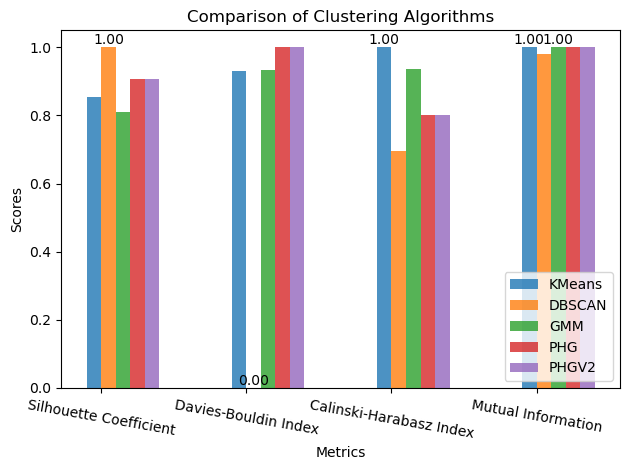

{'Silhouette Coefficient': {'KMeans': 0.8530745700495546, 'DBSCAN': 1.0, 'GMM': 0.8109115588873208, 'PHG': 0.9076042165624768, 'PHGV2': 0.9076042165624768}, 'Davies-Bouldin Index': {'KMeans': 0.9304631343591636, 'DBSCAN': 0.0, 'GMM': 0.9324326330903201, 'PHG': 1.0, 'PHGV2': 1.0}, 'Calinski-Harabasz Index': {'KMeans': 1.0, 'DBSCAN': 0.6970999030811992, 'GMM': 0.9365876126987034, 'PHG': 0.802406966108916, 'PHGV2': 0.802406966108916}, 'Mutual Information': {'KMeans': 1.0, 'DBSCAN': 0.9804993273505503, 'GMM': 1.0, 'PHG': 0.9999999999999997, 'PHGV2': 0.9999999999999997}}


In [16]:
%matplotlib inline
# 定义评价指标和算法的数据
result = {
    "Silhouette Coefficient": {
        "KMeans": silhouette_kmeans,
        "DBSCAN": silhouette_dbscan,
        "GMM": silhouette_gmm,
        "PHG": silhouette_phg,
        "PHGV2": silhouette_phg_v2
    },
    "Davies-Bouldin Index": {
        "KMeans": davies_bouldin_kmeans,
        "DBSCAN": davies_bouldin_dbscan,
        "GMM": davies_bouldin_gmm,
        "PHG": davies_bouldin_phg,
        "PHGV2": davies_bouldin_phg_v2
    },
    "Calinski-Harabasz Index": {
        "KMeans": calinski_harabasz_kmeans,
        "DBSCAN": calinski_harabasz_dbscan,
        "GMM": calinski_harabasz_gmm,
        "PHG": calinski_harabasz_phg,
        "PHGV2": calinski_harabasz_phg_v2
    },
    "Mutual Information": {
        "KMeans": mutual_info_kmeans,
        "DBSCAN": mutual_info_dbscan,
        "GMM": mutual_info_gmm,
        "PHG": mutual_info_phg,
        "PHGV2": mutual_info_phg_v2
    }
}

normalized_data = {}
for metric, scores in result.items():
    if metric == 'Davies-Bouldin Index':
        min_value = min(scores.values())
        normalized_data[metric] = {algo: 1 - (score - min_value) / (max(scores.values()) - min_value) for algo, score in scores.items()}
    else:
        max_value = max(scores.values())
        normalized_data[metric] = {algo: score / max_value for algo, score in scores.items()}


# 转换数据格式以便绘图
metrics = list(normalized_data.keys())
algorithms = list(normalized_data[metrics[0]].keys())
scores = {algo: [normalized_data[metric][algo] for metric in metrics] for algo in algorithms}

# 计算每个指标的最佳得分
max_scores = {
    metric: max(normalized_data[metric].values()) if metric != 'Davies-Bouldin Index' else min(normalized_data[metric].values())
    for metric in metrics
}

# 绘制条形图
fig, ax = plt.subplots()
plt.xticks(rotation=-10)
bar_width = 0.1
opacity = 0.8
index = np.arange(len(metrics))

for i, algo in enumerate(algorithms):
    bars = ax.bar(index + i * bar_width, scores[algo], bar_width, alpha=opacity, label=algo)
    # 为最佳得分添加红色标注
    for bar, score, metric in zip(bars, scores[algo], metrics):
        if score == max_scores[metric]:
            # bar.set_color('red')
            ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(), '%.2f' % score, ha='center', va='bottom', color='black')

# 添加标签、标题和图例
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Clustering Algorithms')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend(loc="lower right")


# 展示图表
plt.tight_layout()
plt.show()

print(normalized_data)

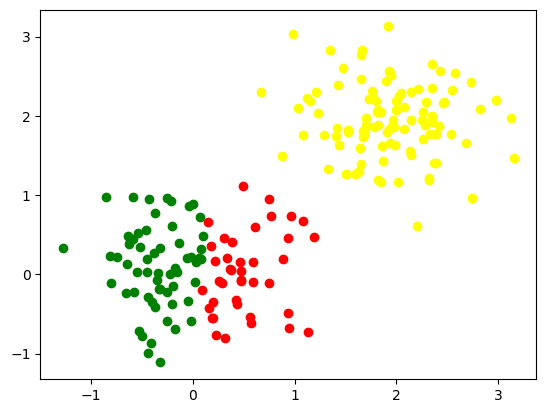

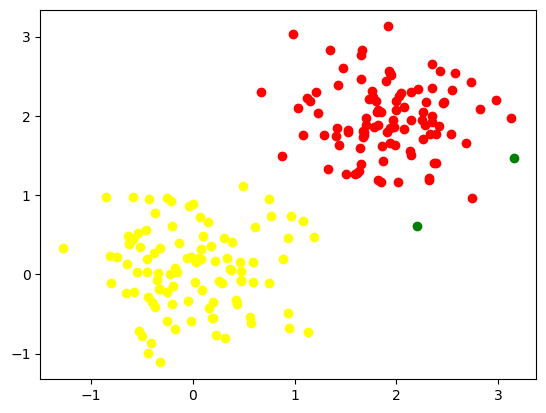

In [17]:
%matplotlib inline
fig, ax = plt.subplots()
for idx, p in enumerate(point_cloud):
    ax.scatter(p[0], p[1], c=color[labels_kmeans[idx]])
plt.show()
fig, ax = plt.subplots()
for idx, p in enumerate(point_cloud):
    ax.scatter(p[0], p[1], c=color[labels_phg[idx]])
plt.show()